In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

# Regression

## Example 1 - Linear Regression

In [ ]:
df = pd.read_csv("dataset1.csv")
print(df.shape)
df.head()

(150, 2)


,x1,y
0,0.000000,0.251493
1,0.006711,0.190664
2,0.013423,0.199697
3,0.020134,0.255534
4,0.026846,0.230805


In [ ]:
X = df[['x1']].values
y = df['y'].values

print(X.shape, "= (n_sample, n_features)")
print(y.shape, "= (n_sample,)")

(150, 1) = (n_sample, n_features)
(150,) = (n_sample,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (120, 1)
X_test shape =  (30, 1)


(0.0, 1.0, 0.0, 1.0)

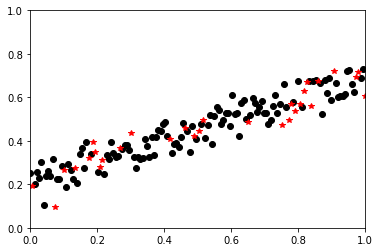

In [ ]:
# visualize the training data
plt.plot(X_train, y_train, 'ko')
plt.plot(X_test, y_test, 'r*')
plt.axis([0, 1, 0, 1])

General pipeline of `sklearn` model fitting
```python
model = sklearn_model
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)
# measure performance using y_test and y_predict
# you can get the parameters by using model.intercept_ and model.coef_ 
```

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

0.21340233163380798
[0.48267886]


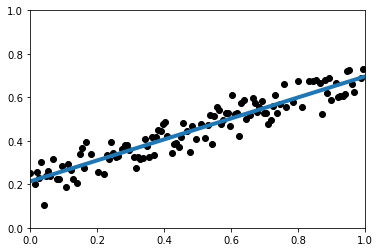

In [ ]:
# visualizing the fitted model
xx = np.linspace(0, 1, 100)
yy = theta0 + theta1*xx
plt.plot(X_train, y_train, 'ko')
plt.plot(xx, yy, lw=4)
plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
# measure performance - mean square error
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data =", mse_train)
print("MSE on testing data =", mse_test)

MSE on training data= 0.0024786147642406778
MSE on testing data= 0.0031120962277328005


## Example 2 - Linear Regression with Feature Engineering

In [ ]:
df = pd.read_csv("dataset2.csv")
print(df.shape)
df.head()

(150, 2)


,x1,y
0,0.000000,0.081242
1,0.006711,0.087722
2,0.013423,0.057933
3,0.020134,0.073257
4,0.026846,0.097313


In [ ]:
X = df[['x1']].values
y = df['y'].values

print(X.shape, "= (n_sample, n_features)")
print(y.shape, "= (n_sample,)")

(150, 1) = (n_sample, n_features)
(150,) = (n_sample,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (120, 1)
X_test shape =  (30, 1)


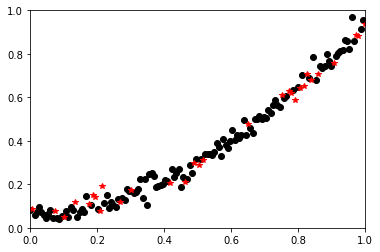

In [ ]:
# visualize the training data
plt.plot(X_train, y_train, 'ko')
plt.plot(X_test, y_test, 'r*')
plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_

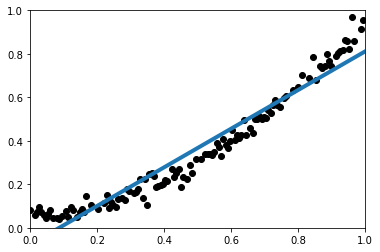

In [ ]:
# visualizing the fitted model
xx = np.linspace(0, 1, 100)
yy = theta0 + theta1*xx
plt.plot(X_train, y_train, 'ko')
plt.plot(xx, yy, lw=4)
plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data =", mse_train)
print("MSE on testing data =", mse_test)

MSE on training data = 0.0044342724929179326
MSE on testing data = 0.004466397014921932


In [ ]:
df['x1^2'] = df['x1']**2
df.head()

,x1,y,x1^2
0,0.000000,0.081242,0.000000
1,0.006711,0.087722,0.000045
2,0.013423,0.057933,0.000180
3,0.020134,0.073257,0.000405
4,0.026846,0.097313,0.000721


In [ ]:
X = df[['x1', 'x1^2']].values
y = df['y'].values

print(X.shape, "= (n_sample, n_features)")
print(y.shape, "= (n_sample,)")

(150, 2) = (n_sample, n_features)
(150,) = (n_sample,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (120, 2)
X_test shape =  (30, 2)


In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

0.053496397613712665
[0.09931488 0.79876521]


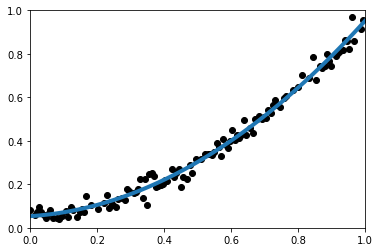

In [ ]:
# visualizing the fitted model
xx = np.linspace(0, 1, 100)
yy = theta0 + theta1[0]*xx + theta1[1]*(xx**2)
plt.plot(X_train[:, 0], y_train, 'ko')
plt.plot(xx, yy, lw=4)
plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data =", mse_train)
print("MSE on testing data =", mse_test)

MSE on training data = 0.0007718495336839055
MSE on testing data = 0.0009814492721656198


## Example 3 - Linear Regression with multiple variables

In [ ]:
data = datasets.load_boston()
X = data['data']
y = data['target']
print(data.keys())

print("shape of X =", X.shape)
print("shape of y =", y.shape)
print("feature names:", data["feature_names"])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
shape of X = (506, 13)
shape of y = (506,)
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(data['data'], columns=data["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print("Feature wise maxima")
print(df.max())
print("Feature wise minima")
print(df.min())

Feature wise maxima
CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64
Feature wise minima
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
dtype: float64


### Normalization

In [ ]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns=data["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=100)

model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 21.649376911833603
MSE on testing data= 23.616994100563634


### Increasing Model Complexity - Adding features

In [ ]:
# adding square terms
df = pd.DataFrame(X_norm, columns=data["feature_names"])
for col in df.columns:
    df[col+"2"] = df[col]**2
    
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS2,NOX2,RM2,AGE2,DIS2,RAD2,TAX2,PTRATIO2,B2,LSTAT2
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.0,0.099108,0.333512,0.411659,0.072470,0.000000,0.043270,0.082503,1.000000,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.0,0.029873,0.300301,0.612617,0.121774,0.001890,0.011017,0.306021,1.000000,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.0,0.029873,0.482172,0.359259,0.121774,0.001890,0.011017,0.306021,0.979580,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.0,0.022562,0.433695,0.195198,0.201192,0.007561,0.004461,0.421118,0.988585,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.0,0.022562,0.472113,0.279123,0.201192,0.007561,0.004461,0.421118,1.000000,0.009868


In [ ]:
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 14.155103098521693
MSE on testing data= 16.53685966013555


In [ ]:
#adding square and cubic temrs
df = pd.DataFrame(X_norm, columns=data["feature_names"])
for col in df.columns:
    df[col+"2"] = df[col]**2
    df[col+"3"] = df[col]**3
    
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RAD2,RAD3,TAX2,TAX3,PTRATIO2,PTRATIO3,B2,B3,LSTAT2,LSTAT3
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.000000,0.000000,0.043270,0.009001,0.082503,0.023698,1.000000,1.000000,0.008042,0.000721
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.001890,0.000082,0.011017,0.001156,0.306021,0.169288,1.000000,1.000000,0.041808,0.008549
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.001890,0.000082,0.011017,0.001156,0.306021,0.169288,0.979580,0.969527,0.004028,0.000256
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.007561,0.000658,0.004461,0.000298,0.421118,0.273279,0.988585,0.982926,0.001115,0.000037
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.007561,0.000658,0.004461,0.000298,0.421118,0.273279,1.000000,1.000000,0.009868,0.000980


In [ ]:
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 12.992408129234382
MSE on testing data= 17.0437976522236


In [ ]:
#adding square, cubic and fourth order terms
df = pd.DataFrame(X_norm, columns=data["feature_names"])
for col in df.columns:
    df[col+"2"] = df[col]**2
    df[col+"3"] = df[col]**3
    df[col+"4"] = df[col]**4
    
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX4,PTRATIO2,PTRATIO3,PTRATIO4,B2,B3,B4,LSTAT2,LSTAT3,LSTAT4
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.001872,0.082503,0.023698,0.006807,1.000000,1.000000,1.000000,0.008042,0.000721,0.000065
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.000121,0.306021,0.169288,0.093649,1.000000,1.000000,1.000000,0.041808,0.008549,0.001748
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.000121,0.306021,0.169288,0.093649,0.979580,0.969527,0.959577,0.004028,0.000256,0.000016
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.000020,0.421118,0.273279,0.177340,0.988585,0.982926,0.977300,0.001115,0.000037,0.000001
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.000020,0.421118,0.273279,0.177340,1.000000,1.000000,1.000000,0.009868,0.000980,0.000097


In [ ]:
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 11.29077423735706
MSE on testing data= 18.346292669248037


the model is overfitting

### Linear Regression with Regularization

In [ ]:
df = pd.DataFrame(data['data'], columns=data["feature_names"])
for col in df.columns:
    df[col+"2"] = df[col]**2
    df[col+"3"] = df[col]**3
df.head()

X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)


model = linear_model.Ridge(alpha=0.01)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 13.084339426073518
MSE on testing data= 17.435506817460666


/Users/mohammedabidabrar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28405e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Hyperparamter selection - validation set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

print("X_train shape = ", X_train.shape)
print("X_valid shape = ", X_valid.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (365, 39)
X_valid shape =  (65, 39)
X_test shape =  (76, 39)


In [ ]:
alpha_test = [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]
mse_validation_all = {}
for alpha in alpha_test:
    model = linear_model.Ridge(alpha=alpha)
    model = model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    mse_validation = np.mean((y_pred_valid - y_valid)**2)
    mse_validation_all[alpha] = mse_validation

/Users/mohammedabidabrar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4302e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/mohammedabidabrar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62272e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/mohammedabidabrar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66365e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/mohammedabidabrar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62315e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/mohammedabidabrar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

In [ ]:
mse_validation_all

{0: 17.07367596034775,
 0.01: 16.541752731451652,
 0.1: 16.17369710202924,
 1: 16.31922625224261,
 10: 18.024994862557847,
 100: 21.039361665803682,
 1000: 24.622590827775078,
 10000: 25.362592809680734}

In [ ]:
final_model = linear_model.Ridge(alpha=0.1)
final_model = final_model.fit(X_train, y_train)
y_predict = final_model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - final_model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 13.948892476085117
MSE on testing data= 14.269691404296106


/Users/mohammedabidabrar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62272e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


# Classification

## Example 4 - Logistic Regression, Breast Cancer Classification

In [ ]:
data = datasets.load_breast_cancer()
X = data['data']
y = data['target']

print("shape of X =", X.shape)
print("shape of y =", y.shape)
print("feature names:", data["feature_names"])

shape of X = (569, 30)
shape of y = (569,)
feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df = pd.DataFrame(data['data'], columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Normalization

In [ ]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=100)

In [ ]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=100)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 99.34065934065934
Testing accuracy (%) = 97.36842105263158
